In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm
import matplotlib.pyplot as plt

import importlib
import mlTest
importlib.reload(mlTest)

<module 'mlTest' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\mlTest.py'>

In [24]:
df_wifi = pd.read_csv("data/wifi_localization.txt", header=None, sep='\t')
df_wifi.describe()

,0,1,2,3,4,5,6,7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [25]:
X = df_wifi.drop(7, axis=1)
y = df_bank[7]

In [26]:
def train_val_test_split(X, y, train_size=0.6, val_size=0.2, random_state=None):
    train_val_size = train_size + val_size
    X_train_val, X_test, y_train_val, y_test = model_selection.train_test_split(X, y, train_size=train_val_size, random_state=random_state)
    X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_val, y_train_val, train_size=train_size/train_val_size, random_state=random_state)
    return X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val
X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val = train_val_test_split(X, y)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
X_train.shape

(1199, 7)

In [28]:
X_val.shape

(401, 7)

In [29]:
X_test.shape

(400, 7)

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
def DTCTest(X_train, y_train, X_val=None, y_val=None, cross_val=True, folds=5):
    train_acc = []
    test_acc = []
    param_vals = []
    min_val = 0
    max_val = 0.01
    num_step = 100
    for param_val in np.linspace(min_val, max_val, num=num_step):
        print("Processing Param Val: {}".format(param_val), end='\r')
        param_vals.append(param_val)
        clf = DecisionTreeClassifier(random_state=0, min_impurity_decrease=param_val)
        if cross_val:
            cv_result = model_selection.cross_validate(clf, X_train, y_train, cv=folds, return_train_score=True)
            #print("Time taken to cross validate: {}".format(np.mean(cv_result['fit_time'])))
            train_acc.append(np.mean(cv_result['train_score']))
            test_acc.append(np.mean(cv_result['test_score']))
        else:
            train_acc.append(test_accuracy(clf, cX_train, cy_train))
            test_acc.append(test_accuracy(clf, X_val, y_val))
    return train_acc, test_acc, param_vals
train_acc, test_acc, param_vals = DTCTest(X_train_val, y_train_val)

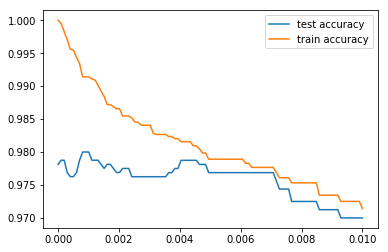

In [31]:
def plot_accuracy(train_acc, test_acc, x_vals, detail=False):
    plt.plot(x_vals, test_acc, label='test accuracy')
    plt.plot(x_vals, train_acc, label='train accuracy')
    if detail:
        plt.xticks(x_vals)
    plt.legend()
    #plt.ylim(0, 1)
    plt.show()
plot_accuracy(train_acc, test_acc, param_vals)

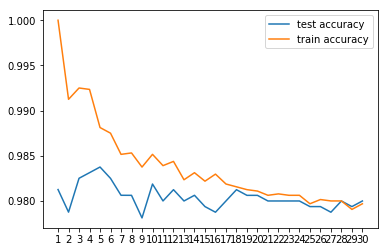

In [33]:
clf = neighbors.KNeighborsClassifier(n_neighbors=8)
def KNNTest(X_train, y_train, X_val=None, y_val=None, cross_val=True, folds=5):
    train_acc = []
    test_acc = []
    param_vals = []
    min_val = 1
    max_val = 30
    num_step = 30
    i = 0
    for param_val in np.linspace(min_val, max_val, num=num_step):
        i += 1
        param_val = int(param_val)
        
        print("Step {}: Processing Param Val: {}".format(i, param_val), end='\r')
        
        param_vals.append(param_val)
        clf = neighbors.KNeighborsClassifier(n_neighbors=param_val)
        if cross_val:
            cv_result = model_selection.cross_validate(clf, X_train, y_train, cv=folds, return_train_score=True)
            #print("Time taken to cross validate: {}".format(np.mean(cv_result['fit_time'])))
            train_acc.append(np.mean(cv_result['train_score']))
            test_acc.append(np.mean(cv_result['test_score']))
        else:
            train_acc.append(test_accuracy(clf, cX_train, cy_train))
            test_acc.append(test_accuracy(clf, X_val, y_val))
    return train_acc, test_acc, param_vals
train_acc, test_acc, param_vals = KNNTest(X_train_val, y_train_val)
plot_accuracy(train_acc, test_acc, param_vals, detail=True)

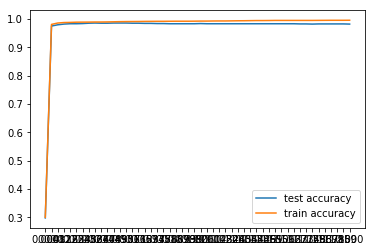

In [35]:
clf = svm.SVC()
def SVCTest(X_train, y_train, X_val=None, y_val=None, cross_val=True, folds=5):
    train_acc = []
    test_acc = []
    param_vals = []
    min_val = .0000001
    max_val = 2
    num_step = 50
    i = 0
    for param_val in np.linspace(min_val, max_val, num=num_step):
        i += 1
        
        print("Step {}: Processing Param Val: {}".format(i, param_val), end='\r')
        
        param_vals.append(param_val)
        clf = svm.SVC(C=param_val, gamma='scale')
        if cross_val:
            cv_result = model_selection.cross_validate(clf, X_train, y_train, cv=folds, return_train_score=True)
            #print("Time taken to cross validate: {}".format(np.mean(cv_result['fit_time'])))
            train_acc.append(np.mean(cv_result['train_score']))
            test_acc.append(np.mean(cv_result['test_score']))
        else:
            train_acc.append(test_accuracy(clf, cX_train, cy_train))
            test_acc.append(test_accuracy(clf, X_val, y_val))
    return train_acc, test_acc, param_vals
train_acc, test_acc, param_vals = SVCTest(X_train_val, y_train_val)
plot_accuracy(train_acc, test_acc, param_vals, detail=True)